* Jackson
* 4/14/24

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_all = pd.read_csv('all_seasons.csv')

In [3]:
df = df_all[df_all['season'].str.startswith(('2020', '2021', '2022'))]

In [4]:
df.tail()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23
12843,12843,JaMychal Green,GSW,33.0,205.74,102.965384,Alabama,USA,Undrafted,Undrafted,...,6.4,3.6,0.9,-8.2,0.087,0.164,0.169,0.650,0.094,2022-23


In [5]:
df.reset_index()

,index,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,11160,11160,Freddie Gillespie,TOR,24.0,205.74,111.130040,Baylor,USA,Undrafted,...,5.6,4.9,0.5,-9.6,0.100,0.142,0.120,0.563,0.034,2020-21
1,11161,11161,Gary Trent Jr.,TOR,22.0,195.58,94.800728,Duke,USA,2018,...,15.3,2.6,1.4,-1.8,0.014,0.069,0.204,0.534,0.067,2020-21
2,11162,11162,Gary Payton II,GSW,28.0,190.50,88.450440,Oregon State,USA,Undrafted,...,2.5,1.1,0.1,2.2,0.051,0.176,0.153,0.847,0.037,2020-21
3,11163,11163,Gary Harris,ORL,26.0,193.04,95.254320,Michigan State,USA,2014,...,9.9,2.0,2.0,-4.2,0.019,0.054,0.164,0.511,0.102,2020-21
4,11164,11164,Gary Clark,PHI,26.0,198.12,102.058200,Cincinnati,USA,Undrafted,...,3.1,2.9,0.8,-7.7,0.044,0.125,0.097,0.436,0.064,2020-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1679,12839,12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
1680,12840,12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
1681,12841,12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
1682,12842,12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [6]:
# change season format
df['season'] = df['season'].str.slice(0, 4)

# Group by team abbreviation and season, then calculate the average player height
player_height = df.groupby(['team_abbreviation', 'season'])['player_height'].mean().reset_index()

# Rename columns appropriately
player_height.rename(columns={'player_height': 'avg_player_height'}, inplace=True)

# 'grouped_data' now contains the average player height per team per season
player_height

/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/467364703.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['season'] = df['season'].str.slice(0, 4)


,team_abbreviation,season,avg_player_height
0,ATL,2020,198.717647
1,ATL,2021,198.482857
2,ATL,2022,198.966667
3,BKN,2020,198.966667
4,BKN,2021,198.120000
...,...,...,...
85,UTA,2021,198.755000
86,UTA,2022,201.295000
87,WAS,2020,200.095556
88,WAS,2021,198.009565


In [7]:
player_height.rename(columns = {'team_abbreviation':'abbreviation'}, inplace = True)

In [8]:
summary_df = pd.read_csv('Team Summaries.csv')

In [9]:
teamsum_df = summary_df[summary_df['season'].isin([2020, 2021, 2022])]
teamsum_df.reset_index()
teamsum_df.dropna

<bound method DataFrame.dropna of      season   lg                team abbreviation  playoffs   age     w     l  \
62     2022  NBA       Atlanta Hawks          ATL      True  26.1  43.0  39.0   
63     2022  NBA      Boston Celtics          BOS      True  26.1  51.0  31.0   
64     2022  NBA       Brooklyn Nets          BRK      True  29.1  44.0  38.0   
65     2022  NBA       Chicago Bulls          CHI      True  26.3  46.0  36.0   
66     2022  NBA   Charlotte Hornets          CHO     False  25.5  43.0  39.0   
..      ...  ...                 ...          ...       ...   ...   ...   ...   
150    2020  NBA   San Antonio Spurs          SAS     False  27.6  32.0  39.0   
151    2020  NBA     Toronto Raptors          TOR      True  26.6  53.0  19.0   
152    2020  NBA           Utah Jazz          UTA      True  27.3  44.0  28.0   
153    2020  NBA  Washington Wizards          WAS     False  25.1  25.0  47.0   
154    2020  NBA      League Average          NaN     False  26.2   NaN   N

In [10]:
teamsum_df.reset_index(inplace=True)

In [11]:
wins_per_team = teamsum_df[['abbreviation', 'w', 'season']]
wins_per_team.reset_index()
wins_per_team.to_csv('./wins_per_team.csv')
#wins_per_team.transpose()

In [12]:
wins_per_team.drop([30, 61, 92], axis=0, inplace=True)

/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/33493035.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_per_team.drop([30, 61, 92], axis=0, inplace=True)


In [13]:
player_height['season'] = player_height['season'].astype(int)
wins_per_team['season'] = wins_per_team['season'].astype(int)

/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/2407193105.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_per_team['season'] = wins_per_team['season'].astype(int)


In [14]:
wins_per_team.to_csv('./wins_per_team.csv')
player_height.to_csv('./player_height.csv')

In [15]:
# PHO to PHX in wins_per_team, BRK to BKN
wins_per_team['abbreviation'] = wins_per_team['abbreviation'].replace('PHO', 'PHX')
wins_per_team['abbreviation'] = wins_per_team['abbreviation'].replace('BRK', 'BKN')
wins_per_team['abbreviation'] = wins_per_team['abbreviation'].replace('CHO', 'CHA')

/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/324183148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_per_team['abbreviation'] = wins_per_team['abbreviation'].replace('PHO', 'PHX')
/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/324183148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wins_per_team['abbreviation'] = wins_per_team['abbreviation'].replace('BRK', 'BKN')
/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/324183148.py:4: SettingWi

In [16]:
merged = pd.merge(player_height, wins_per_team, left_on=['abbreviation', 'season'], right_on=['abbreviation', 'season'], how='inner')

In [17]:
merged

# normalize / scale data

,abbreviation,season,avg_player_height,w
0,ATL,2020,198.717647,20.0
1,ATL,2021,198.482857,41.0
2,ATL,2022,198.966667,43.0
3,BKN,2020,198.966667,35.0
4,BKN,2021,198.120000,48.0
...,...,...,...,...
85,UTA,2021,198.755000,52.0
86,UTA,2022,201.295000,49.0
87,WAS,2020,200.095556,25.0
88,WAS,2021,198.009565,34.0


In [18]:
merged.to_csv('./merged.csv')
wins_per_team.to_csv('./wins_per_team.csv')
player_height.to_csv('./player_height.csv')

In [19]:
import altair as alt


slider = alt.binding_range(min = int(merged['season'].min()), max = int(merged['season'].max()), step=1)
select_season = alt.selection(
    type='single',  
    fields=['season'],
    bind=slider,
    name= "Select"
)

# Create the chart
chart = alt.Chart(merged).mark_circle(size=60).encode(
    x=alt.X('avg_player_height:Q', title='Average Height (cm)', scale=alt.Scale(domain=[196, 203])),
    y=alt.Y('w:Q', title='Number of Wins', scale=alt.Scale(domain=[10, 70])),
    tooltip=['abbreviation'],  # Adding tooltips for interactivity
    color=alt.Color('season:O', scale=alt.Scale(scheme='viridis'), legend=alt.Legend(title='Season'))
).properties(
    width = 600,  # Width of the plot
    height = 400,  # Height of the plot
    title = 'Relationship Between Team Average Height and Wins'
).add_selection(
    select_season
).transform_filter(
    select_season
)

chart.display()  


/Users/jacksondavis/miniconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'selection' is deprecated.
   Use 'selection_point()' or 'selection_interval()' instead; these functions also include more helpful docstrings.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/jacksondavis/miniconda3/lib/python3.11/site-packages/altair/vegalite/v5/api.py:425: AltairDeprecationWarning: The types 'single' and 'multi' are now
        combined and should be specified using "selection_point()".
  warnings.warn(
/Users/jacksondavis/miniconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/jacksondavis/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser

alt.Chart(...)

In [20]:
oe_data = pd.read_csv('nbaHomeWinLossModelDataset.csv').drop(['Unnamed: 0'],axis=1)
oe_data = oe_data.dropna()
oe_data

,HOME_LAST_GAME_OE,HOME_LAST_GAME_HOME_WIN_PCTG,HOME_NUM_REST_DAYS,HOME_LAST_GAME_AWAY_WIN_PCTG,HOME_LAST_GAME_TOTAL_WIN_PCTG,HOME_LAST_GAME_ROLLING_SCORING_MARGIN,HOME_LAST_GAME_ROLLING_OE,HOME_W,SEASON,AWAY_LAST_GAME_OE,AWAY_LAST_GAME_HOME_WIN_PCTG,AWAY_NUM_REST_DAYS,AWAY_LAST_GAME_AWAY_WIN_PCTG,AWAY_LAST_GAME_TOTAL_WIN_PCTG,AWAY_LAST_GAME_ROLLING_SCORING_MARGIN,AWAY_LAST_GAME_ROLLING_OE
0,0.555556,0.685714,3.0,0.444444,0.563380,9.333333,0.571405,1,2020-21,0.612903,0.250000,2.0,0.228571,0.239437,-2.000000,0.605315
1,0.573913,0.676471,1.0,0.444444,0.557143,-0.666667,0.589472,1,2020-21,0.500000,0.305556,2.0,0.303030,0.304348,-18.000000,0.512228
2,0.584746,0.666667,2.0,0.444444,0.550725,8.666667,0.640592,1,2020-21,0.612403,0.500000,2.0,0.428571,0.463768,0.666667,0.567718
3,0.609756,0.656250,4.0,0.444444,0.544118,11.333333,0.653327,1,2020-21,0.539568,0.500000,2.0,0.441176,0.470588,0.666667,0.570866
4,0.512397,0.354839,1.0,0.558824,0.461538,11.000000,0.596498,1,2020-21,0.727273,0.656250,1.0,0.457143,0.552239,17.333333,0.633081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3535,0.531250,1.000000,2.0,0.500000,0.666667,-0.333333,0.547383,1,2022-23,0.533898,1.000000,3.0,0.000000,0.333333,-9.666667,0.549413
3536,0.626087,0.242424,2.0,0.212121,0.227273,-10.666667,0.564607,0,2022-23,0.605263,0.354839,2.0,0.277778,0.313433,-6.666667,0.534304
3537,0.517857,0.357143,2.0,0.264706,0.306452,7.666667,0.553343,1,2022-23,0.537815,0.266667,2.0,0.225806,0.245902,-8.000000,0.538467
3538,0.529412,0.240000,4.0,0.259259,0.250000,-0.333333,0.566698,1,2022-23,0.522523,0.304348,1.0,0.266667,0.283019,-6.666667,0.550896


In [21]:
oe_data = oe_data[['AWAY_LAST_GAME_OE', 'HOME_LAST_GAME_OE', 'HOME_W', 'SEASON']]

In [22]:
oe_data['HOME_W'] = oe_data['HOME_W'].replace({1: 'Win', 0: 'Loss'})

/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/1739138985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oe_data['HOME_W'] = oe_data['HOME_W'].replace({1: 'Win', 0: 'Loss'})


In [23]:
oe_data['SEASON'] = oe_data['SEASON'].str.slice(0, 4)
oe_data['SEASON'] = oe_data['SEASON'].astype(int)

/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/1570150276.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oe_data['SEASON'] = oe_data['SEASON'].str.slice(0, 4)
/var/folders/_q/3s8nqz1s28z8dj5xwq73pty80000gn/T/ipykernel_11495/1570150276.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oe_data['SEASON'] = oe_data['SEASON'].astype(int)


In [24]:
oe_data.to_csv('./oe_data.csv')

In [25]:
"""slider = alt.binding_range(min = int(oe_data['SEASON'].min()), max = int(oe_data['SEASON'].max()), step=1)
select_season = alt.selection(
    type='single',  
    fields=['SEASON'],
    bind=slider,
    #name= "Select"
)"""

chart = alt.Chart(oe_data).mark_boxplot(size=60).encode(
    x = alt.X('AWAY_LAST_GAME_OE:Q', title='Last Away Game OE', scale=alt.Scale(domain=[0.25,0.8])),
    y = alt.Y('HOME_W:N', title='Wins or loss',),# scale=alt.Scale(domain=[0,5])),
    color = alt.Color('HOME_W:N', scale=alt.Scale(scheme='viridis'), legend=alt.Legend(title='Season')) 
).properties(
    width=600,  
    height=400, 
    title='Relationship Between Last Away Game OE and Wins'
).interactive()

chart.display() 

/Users/jacksondavis/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

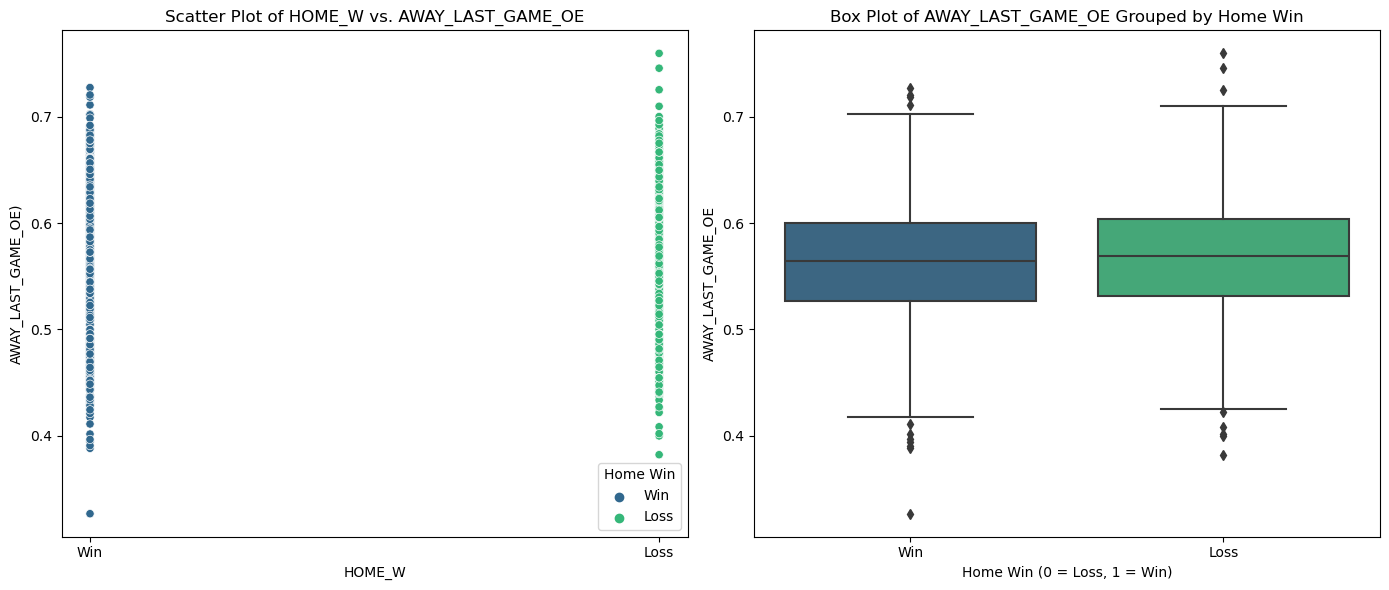

In [26]:
plt.figure(figsize=(14, 6))

# Scatter Plot
plt.subplot(1, 2, 1)
sns.scatterplot(x = oe_data['HOME_W'], y = oe_data['AWAY_LAST_GAME_OE'], hue = oe_data['HOME_W'], palette = "viridis")
plt.title('Scatter Plot of HOME_W vs. AWAY_LAST_GAME_OE')
plt.xlabel('HOME_W')
plt.ylabel('AWAY_LAST_GAME_OE)')
plt.legend(title='Home Win')

# Box Plot Grouped by HOME_W
plt.subplot(1, 2, 2)
sns.boxplot(x = oe_data['HOME_W'], y = oe_data['AWAY_LAST_GAME_OE'], palette="viridis")
plt.title('Box Plot of AWAY_LAST_GAME_OE Grouped by Home Win')
plt.xlabel('Home Win (0 = Loss, 1 = Win)')
plt.ylabel('AWAY_LAST_GAME_OE')

plt.tight_layout()
plt.show()

In [27]:
chart = alt.Chart(oe_data).mark_boxplot(size=60).encode(
    x=alt.X('AWAY_LAST_GAME_OE:Q', title='Last Away Game OE', scale=alt.Scale(domain=[0.25, 0.8])),
    y=alt.Y('HOME_W:N', title='Wins or Loss'),
    color=alt.Color('HOME_W:N', scale=alt.Scale(scheme='viridis'), legend=alt.Legend(title='Game Type'))
).properties(
    width=600,
    height=400,
    title='Relationship Between Last Away Game OE and Wins'
).add_selection(
    select_season
).interactive()

chart2 = alt.Chart(oe_data).mark_boxplot(size=60).encode(
    x=alt.X('HOME_LAST_GAME_OE:Q', title='Last Away Game OE', scale=alt.Scale(domain=[0.25, 0.8])),
    y=alt.Y('HOME_W:N', title='Wins or Loss'),
    color=alt.Color('HOME_W:N', scale=alt.Scale(scheme='viridis'), legend=alt.Legend(title='Game Type'))
).properties(
    width=600,
    height=400,
    title='Relationship Between Last Home Game OE and Wins'
).add_selection(
    select_season
).interactive()


combined_chart = alt.hconcat(chart, chart2)
combined_chart

/Users/jacksondavis/miniconda3/lib/python3.11/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning: 'add_selection' is deprecated. Use 'add_params' instead.
  warnings.warn(message, AltairDeprecationWarning, stacklevel=1)
/Users/jacksondavis/miniconda3/lib/python3.11/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.HConcatChart(...)

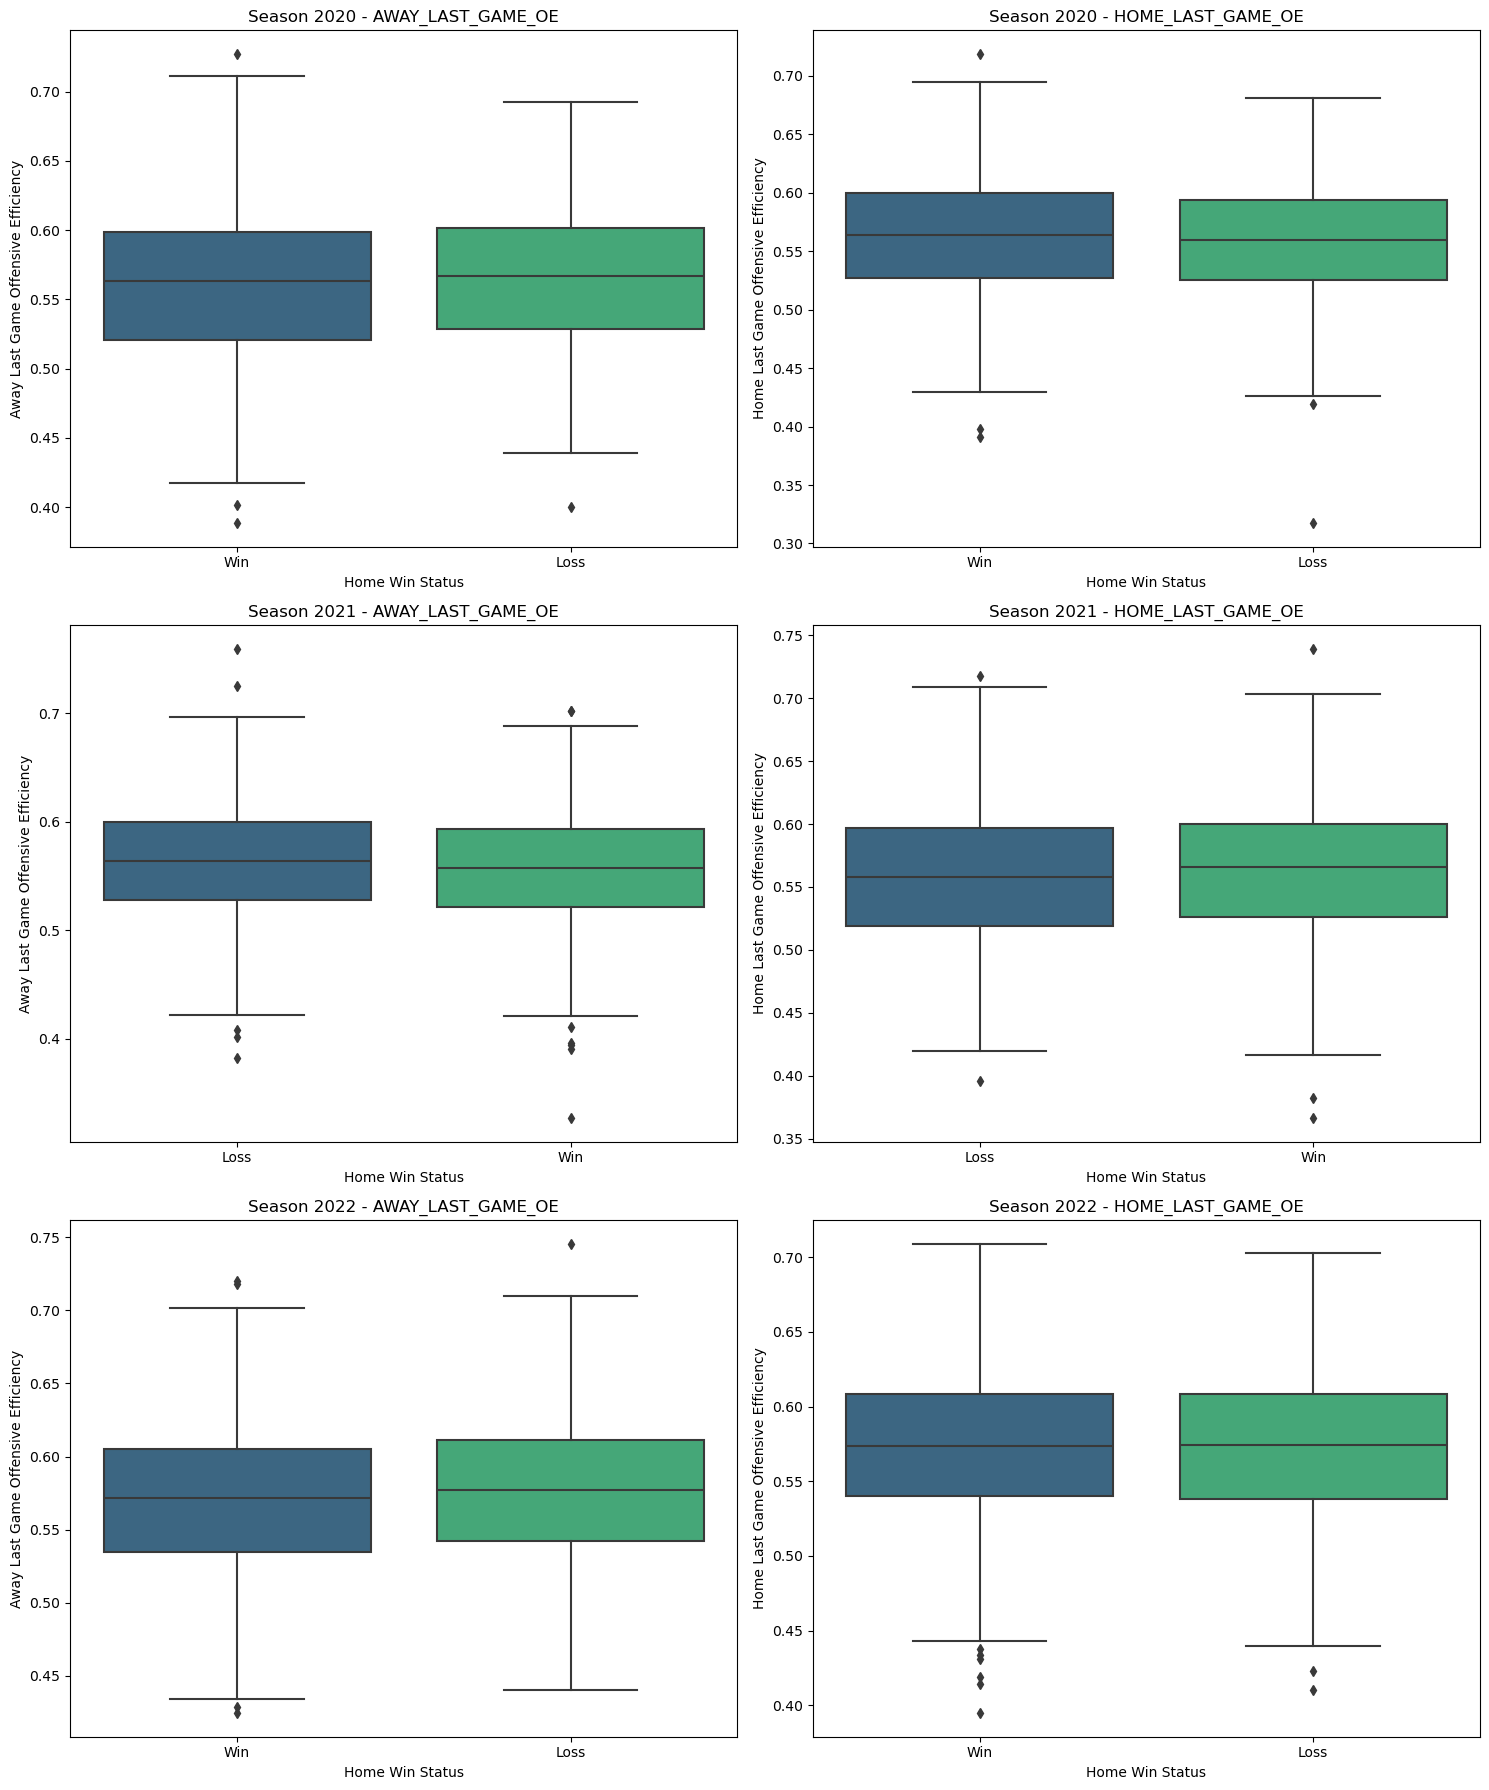

In [28]:
import seaborn as sns

data = oe_data


seasons = sorted(data['SEASON'].unique())

# Create a figure to hold the subplots
num_seasons = len(seasons)
fig, axes = plt.subplots(nrows=num_seasons, ncols=2, figsize=(15, 6 * num_seasons))

# Plotting loop for each season
for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = data[data['SEASON'] == season]
    
    # Box plot for AWAY_LAST_GAME_OE
    sns.boxplot(ax=axes[i, 0], x='HOME_W', y='AWAY_LAST_GAME_OE', data=season_data, palette="viridis")
    axes[i, 0].set_title(f'Season {season} - AWAY_LAST_GAME_OE')
    axes[i, 0].set_xlabel('Home Win Status')
    axes[i, 0].set_ylabel('Away Last Game Offensive Efficiency')

    # Box plot for HOME_LAST_GAME_OE
    sns.boxplot(ax=axes[i, 1], x='HOME_W', y='HOME_LAST_GAME_OE', data=season_data, palette="viridis")
    axes[i, 1].set_title(f'Season {season} - HOME_LAST_GAME_OE')
    axes[i, 1].set_xlabel('Home Win Status')
    axes[i, 1].set_ylabel('Home Last Game Offensive Efficiency')

# Adjust layout
plt.tight_layout()
plt.show()


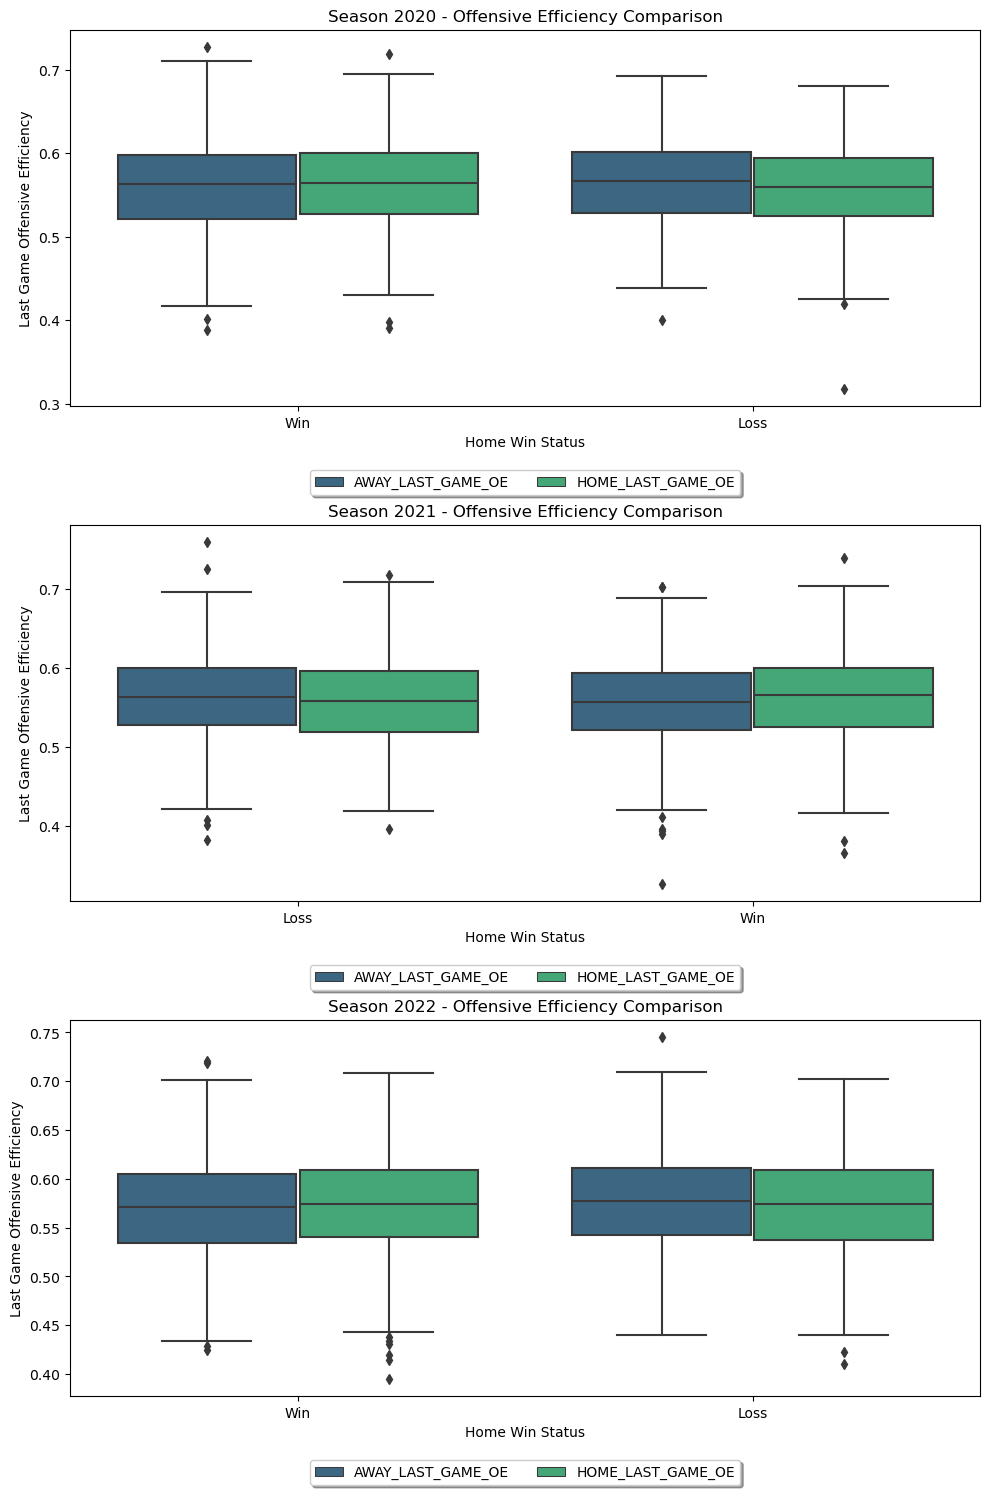

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your dataframe and it's loaded as 'oe_data'
data = oe_data

# Get unique seasons sorted
seasons = sorted(data['SEASON'].unique())

# Create a figure to hold the subplots, adjust figsize as needed
num_seasons = len(seasons)
fig, axes = plt.subplots(nrows=num_seasons, ncols=1, figsize=(10, 5 * num_seasons))

# Plotting loop for each season
for i, season in enumerate(seasons):
    # Filter data for the current season
    season_data = data[data['SEASON'] == season]
    
    # We need to include 'HOME_W' in the melt to preserve it for plotting
    melted_data = season_data.melt(id_vars=['HOME_W'], value_vars=['AWAY_LAST_GAME_OE', 'HOME_LAST_GAME_OE'],
                                   var_name='Team Type', value_name='Last Game OE')
    
    # Box plot for both away and home last game OE
    sns.boxplot(ax=axes[i], x='HOME_W', hue='Team Type', y='Last Game OE', data=melted_data, palette="viridis")
    axes[i].set_title(f'Season {season} - Offensive Efficiency Comparison')
    axes[i].set_xlabel('Home Win Status')
    axes[i].set_ylabel('Last Game Offensive Efficiency')

    axes[i].legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

# Adjust layout
plt.tight_layout()
plt.show()
